In [1]:
"""
Datta, "Quantum Transport: Atom to Transistor" Fig. 8.2.5 & 8.2.6

Yong-Hoon Kim, School of Electrical Engineering, Korea Advanced Institute of Science & Technology (KAIST)
2020/12/26
"""
import numpy as np
from numpy import linalg as LA 
from numpy.linalg import inv
import matplotlib.pyplot as plt

# Atomic units
AU2ANG = 0.5291772109
AU2EV = 27.211386245

# Effective mass atomic units
em = 0.25   # effective mass [free electron mass] 
eps = 1.0   # permittivity [vacuum permittivity]
EU2ANG = AU2ANG * eps / em
EU2EV = AU2EV * em / eps
print(EU2ANG, EU2EV)
ANG2EU = 1/EU2ANG
EV2EU = 1/EU2EV
#print(ANG2EU,EV2EU)

2.1167088436 6.80284656125


In [2]:
# Input 
UU = 0.2    # potential increase: -UU/2 eV ~ +UU/2 eV
mu = 0.25   # electrochemical potential = E_c + \mu eV
kT = 0.025  # thermal energy [eV]

xmin = 0.; xmax = 102.  # X range [Ang]
nx = 50  # Num. of grid points (excluding box boundary points)

emin = -0.1; emax = 0.4  # E range [eV]
ne = 250

# Convert to EU
UU = UU * EV2EU
mu = mu * EV2EU
kT = kT * EV2EU
xmin = xmin * ANG2EU; xmax = xmax * ANG2EU
emin = emin * EV2EU;  emax = emax * EV2EU

In [3]:
# X grid
X = np.linspace(xmin,xmax,nx+2)
dx = X[1] - X[0]
X = X[1:-1]
print(X*EU2ANG)
print('dx= %.1f [Ang]' % (dx*EU2ANG))

[  2.   4.   6.   8.  10.  12.  14.  16.  18.  20.  22.  24.  26.  28.
  30.  32.  34.  36.  38.  40.  42.  44.  46.  48.  50.  52.  54.  56.
  58.  60.  62.  64.  66.  68.  70.  72.  74.  76.  78.  80.  82.  84.
  86.  88.  90.  92.  94.  96.  98. 100.]
dx= 2.0 [Ang]


In [4]:
# Hamiltonian
t0 = 1/(2*dx**2)
print(t0)
H= 2*t0*np.eye(nx) - t0*np.eye(nx,k=+1) - t0*np.eye(nx,k=-1) # Hamiltonian
Ux = np.linspace(-UU/2, UU/2, nx) # Potential
print(Ux[0]*EU2EV)
H = H + np.diag(Ux)

0.5600570410718063
-0.10000000000000002


Total density from PBC = 2.0699539169183794


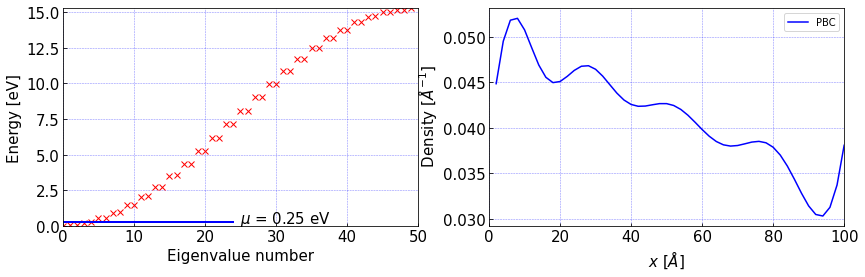

In [5]:
# Method 1: Matrix diagonalization 

# Keep H for GF calcualtions
Hpbc= np.zeros((nx,nx))
Hpbc[:] = H[:]  
Hpbc[0,nx-1] = -t0; Hpbc[nx-1,0] = -t0  # PBC

# (1) Diagonalization 
# (E = V^+ H V => [V]: columns are eigenvectors corresponding to eigenvalues [E]):
En,V   = LA.eigh(Hpbc)
#print(En*EU2EV)
# (2) Density matrix @ Eqm.: Fermi function of the Hamiltonian function:
rho = 1/(1 + np.exp((En-mu)/kT))
#print(rho)
# (3) Transforms DM back to the original representation:
rho = V.dot(np.diag(rho)).dot(V.conj().T)
#print(np.sum(rho))
rho = np.diag(rho)/dx
print('Total density from PBC =',np.sum(rho)/EU2ANG)

# Plot eigenvalues & PBC density
fig = plt.figure(figsize=[14,4])
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(En*EU2EV,'rx',lw=2)
ax1.plot(mu*EU2EV*np.ones((nx//2,1)),'b',lw=2)
ax1.set_xlim(0,nx)
ax1.set_ylim(0,En[-1]*EU2EV)
ax1.set_xlabel('Eigenvalue number',fontsize=15)
ax1.set_ylabel('Energy [eV]',fontsize=15)
ax1.tick_params(axis='both',which='major',labelsize=15,direction='in')
ax1.text(25,0.2,'$\mu$ = %.2f eV'% (mu*EU2EV),fontsize=15)
ax1.grid(color='b', alpha=0.5, ls='--',lw=0.5)

ax2.plot(X*EU2ANG ,rho/EU2ANG,'b', label='PBC')
ax2.set_xlim(0, 100)
#ax2.set_ylim(0.034, 0.048)
ax2.set_xlabel('$x$ [$\AA$]',fontsize = 15)
ax2.set_ylabel(' Density [$\AA^{-1}$]',fontsize = 15)
ax2.legend()
ax2.tick_params(axis='both',which='major',labelsize=15,direction='in')
#ax2.xticks(arange(0.2e-8,1.2e-8,0.2e-8))
ax2.grid(color='b',alpha=0.5,ls='--',lw=0.5)

[-0.1   -0.098 -0.096 -0.094 -0.092 -0.09  -0.088 -0.086 -0.084 -0.082
 -0.08  -0.078 -0.076 -0.074 -0.072 -0.07  -0.068 -0.066 -0.064 -0.062
 -0.06  -0.058 -0.056 -0.054 -0.052 -0.05  -0.048 -0.046 -0.044 -0.042
 -0.04  -0.038 -0.036 -0.034 -0.032 -0.03  -0.028 -0.026 -0.024 -0.022
 -0.02  -0.018 -0.016 -0.014 -0.012 -0.01  -0.008 -0.006 -0.004 -0.002
  0.     0.002  0.004  0.006  0.008  0.01   0.012  0.014  0.016  0.018
  0.02   0.022  0.024  0.026  0.028  0.03   0.032  0.034  0.036  0.038
  0.04   0.042  0.044  0.046  0.048  0.05   0.052  0.054  0.056  0.058
  0.06   0.062  0.064  0.066  0.068  0.07   0.072  0.074  0.076  0.078
  0.08   0.082  0.084  0.086  0.088  0.09   0.092  0.094  0.096  0.098
  0.1    0.102  0.104  0.106  0.108  0.11   0.112  0.114  0.116  0.118
  0.12   0.122  0.124  0.126  0.128  0.13   0.132  0.134  0.136  0.138
  0.14   0.142  0.144  0.146  0.148  0.15   0.152  0.154  0.156  0.158
  0.16   0.162  0.164  0.166  0.168  0.17   0.172  0.174  0.176  0.178
  0.18

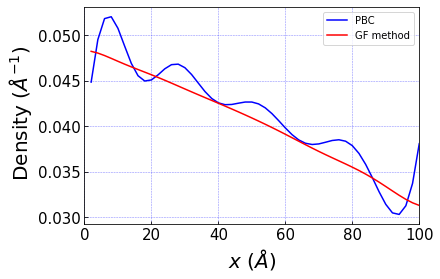

In [6]:
# Method 2: Green's function method

# Energy grid for GF method
E = np.linspace(emin,emax,ne+1)
dE = E[2] - E[1]
E = E[:-1]
print(E*EU2EV)
print('dE= %.3f [eV]' % (dE*EU2EV))
zplus = 1j * 1e-12 * EV2EU
fE = 1/(1 + np.exp((E - mu)/kT) )
#print(fE)

# Green's function method
sig1 = np.zeros((nx,nx), dtype=complex)
sig2 = np.zeros((nx,nx), dtype=complex)
rho2 = np.zeros(nx)

DE1 = np.zeros(ne)
DE2 = np.zeros(ne)

for k in range(0,ne):
    ck = 1 - (E[k] + zplus - Ux[0])/(2*t0)
    ka = np.arccos(ck)
#    sigma = -t0*np.exp(1j*ka)
#    print('sigma1',k,E[k]*EU2EV,sigma*EU2EV)
#    sig1[0,0] = sigma
    sig1[0,0] = -t0*np.exp(1j*ka)

    ck = 1 - (E[k] + zplus - Ux[nx-1])/(2*t0)
    ka = np.arccos(ck) 
#    sigma = -t0*np.exp(1j*ka)
#    print('sigma2',k,E[k]*EU2EV,sigma*EU2EV)
#    sig2[nx-1,nx-1] = sigma
    sig2[nx-1,nx-1] = -t0*np.exp(1j*ka)
    
    G = inv((E[k]+zplus)*np.eye(nx) - H - sig1 - sig2)
    
    D0 = 1/(2*np.pi) * np.diag(1j*(G - G.conj().T))                             

    rho2 = rho2 + dE/dx * fE[k] * D0.real
#    print(np.diag(1j*(G - G.conj().T)).real)

    DE1[k] = D0[0].real
    DE2[k] = D0[nx-1].real
#    print(De1[k],De2[k])
    
print('Total density from GF method =',sum(rho2)/EU2ANG)

# Compare PBC density amd GF density:
fig = plt.figure()
plt.plot(X*EU2ANG ,rho/EU2ANG,'b', label='PBC')
plt.plot(X*EU2ANG ,rho2/EU2ANG,'r', label='GF method')
plt.xlabel('$x$ ($\AA$)',fontsize = 20)
plt.ylabel(' Density ($\AA^{-1}$)',fontsize = 20)
plt.legend()
plt.xlim(0, 100)
#plt.ylim(0.034, 0.048)
plt.tick_params(axis='both',which='major',labelsize=15,direction='in')
#plt.xticks(arange(0.2e-8,1.2e-8,0.2e-8))
plt.grid(color='b', alpha=0.5, ls='--',lw=0.5)

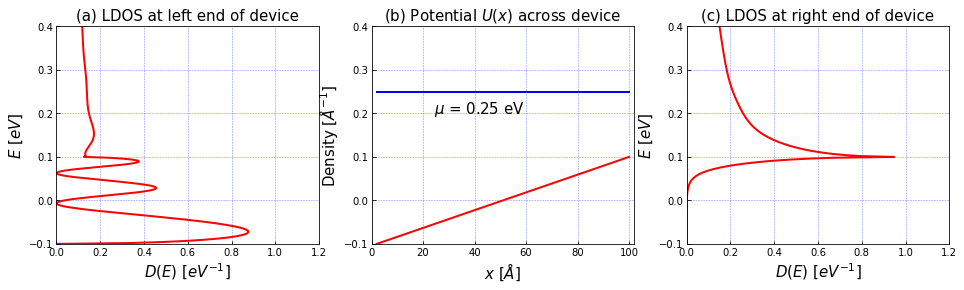

In [7]:
fig = plt.figure(figsize=[16,4])

ax1 = fig.add_subplot(1,3,1)
ax1.plot(DE1/EU2EV,E*EU2EV,'r',lw=2)
ax1.set_xlim(0,1.2)
ax1.set_ylim(-0.1,0.4)
ax1.set_xlabel('$D(E) \ [eV^{-1}]$',fontsize=15)
ax1.set_ylabel('$E \ [eV]$',fontsize=15)
ax1.set_title('(a) LDOS at left end of device',fontsize=15)
ax1.tick_params(axis='both',which='major',labelsize=10,direction='in')
ax1.grid(color='b', alpha=0.5, ls='--',lw=0.5)

ax2 = fig.add_subplot(1,3,2)
ax2.plot(X*EU2ANG,Ux*EU2EV,'r',lw=2)
ax2.plot(X*EU2ANG,mu*EU2EV*np.ones(nx),'b',lw=2)
ax2.set_xlim(xmin*EU2ANG,xmax*EU2ANG)
ax2.set_ylim(-0.1,0.4)
ax2.set_xlabel('$x \ [\AA]$',fontsize = 15)
ax2.set_ylabel('Density [$\AA^{-1}$]',fontsize = 15)
ax2.set_title('(b) Potential $U(x)$ across device',fontsize=15)
ax2.text(xmax/2,0.2,'$\mu$ = %.2f eV'% (mu*EU2EV),fontsize=15)
ax2.tick_params(axis='both',which='major',labelsize=10,direction='in')
ax2.grid(color='b', alpha=0.5, ls='--',lw=0.5)

ax3 = fig.add_subplot(1,3,3)
ax3.plot(DE2/EU2EV,E*EU2EV,'r',lw=2)
ax3.set_xlim(0,1.2)
ax3.set_ylim(-0.1,0.4)
ax3.set_xlabel('$D(E) \ [eV^{-1}]$',fontsize=15)
ax3.set_ylabel('$E \ [eV]$',fontsize=15)
ax3.set_title('(c) LDOS at right end of device',fontsize=15)
ax3.tick_params(axis='both',which='major',labelsize=10,direction='in')
ax3.grid(color='b', alpha=0.5, ls='--',lw=0.5)